Warning message:
“package ‘rtdists’ was built under R version 3.4.3”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.00743534279065785.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0223060283719735.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0104418970731532.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0145512524563346.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0251282128081405.
Increase/decrease interval or obtain for different response.”Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0249060023350655.
Increase/decre

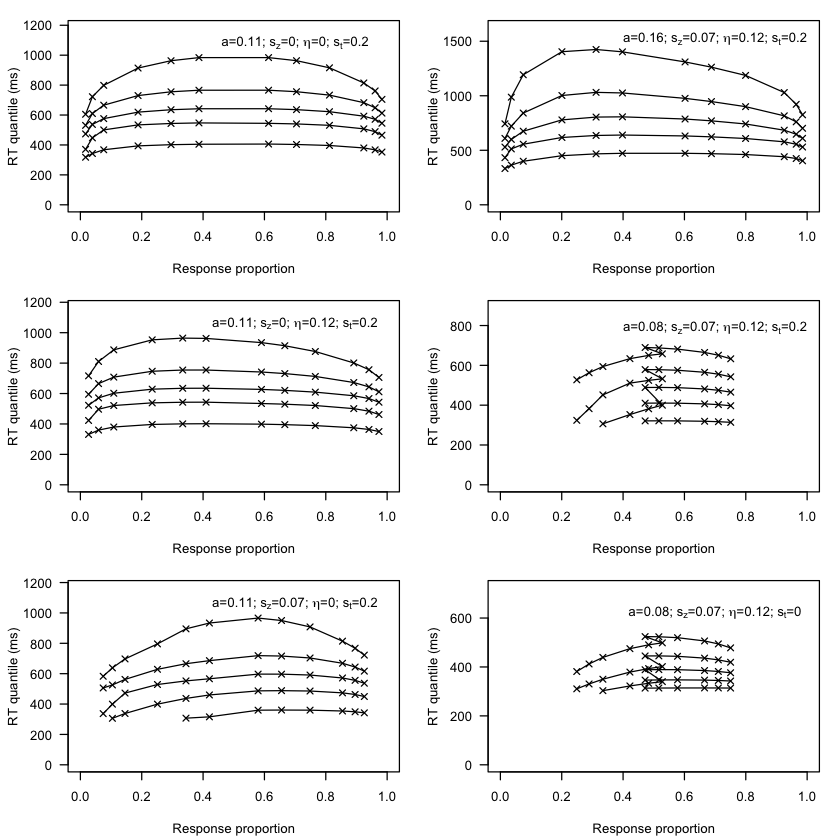

In [1]:
#function to plot a quantile probability function
library("rtdists")
qpf <- function(a,v,t0,sz,sv,st0) {
  d  <- 0       #no preference for either boundary   
  z  <- 0.5*a   #starting point in the middle        
  #get maximum response probabilities
  #with infinite RT
  maxpUp <- pdiffusion(rep(Inf, length(v)), response="upper", 
                       a=a,v=v,t0=t0,z=z,d=d,sz=sz,sv=sv,st0=st0,s=0.1,precision=1)      
  maxpLr <- pdiffusion(rep(Inf, length(v)), response="lower", 
                       a=a,v=v,t0=t0,z=z,d=d,sz=sz,sv=sv,st0=st0,s=0.1,precision=1)      
  
  #now obtain RTs in ms for quantiles and plot
  qtiles <- seq(from=.1, to=.9, by=.2)
  lmp <- length(maxpUp)
  forqpfplot <- matrix(0,length(qtiles),lmp*2)
  for (i in c(1:lmp)) { 
    forqpfplot[,i]     <- qdiffusion(qtiles*maxpLr[lmp+1-i],
                                      response="lower",maxt=10,
                                        a=a,v=v[lmp+1-i],t0=t0,z=z,d=d,sz=sz,sv=sv,st0=st0,s=0.1,precision=1)*1000
    forqpfplot[,lmp+i] <- qdiffusion(qtiles*maxpUp[i], 
                                     response="upper",maxt=10,
                                     a=a,v=v[i],t0=t0,d=d,z=z,sz=sz,sv=sv,st0=st0,s=0.1,precision=1)*1000
  }                     
  plot(0,0,type="n",las=1,
       ylim=c(0,max(forqpfplot,na.rm=TRUE)+200),xlim=c(0,1),
       xlab="Response proportion",
       ylab="RT quantile (ms)")
  apply(forqpfplot,1, FUN=function(x) lines(c(rev(maxpLr),maxpUp),x) )
  apply(forqpfplot,1, FUN=function(x) points(c(rev(maxpLr),maxpUp),x,pch=4) )
  text(.7,max(forqpfplot,na.rm=TRUE)+100, 
       substitute(paste("a=",anum,"; ",
                        s[z],"=", 
                        sznum,"; ",
                        eta,"=",svnum,"; ",
                        s[t],"=",stnum),
                        list(anum=a,sznum=sz,svnum=sv,stnum=st0)))
} 

library(rtdists)
#parameters are from Ratcliff & McKoon (2008)
#drift rates
v  <- c(.042,.079,.133,.227,.291,.369)

#call function to plot for various parameter values
par(mfcol=c(3,2),mar = c(4, 4, 1, 1) + 0.3)
qpf(a=.11, v, t0=0.3, sz=0,    sv=0.0,  st0=0.2)  
qpf(a=.11, v, t0=0.3, sz=0,    sv=0.12, st0=0.2)
qpf(a=.11, v, t0=0.3, sz=0.07, sv=0.0,  st0=0.2)
qpf(a=.16, v, t0=0.3, sz=0.07, sv=0.12, st0=0.2)
qpf(a=.08, v, t0=0.3, sz=0.07, sv=0.12, st0=0.2)
qpf(a=.08, v, t0=0.3, sz=0.07, sv=0.12, st0=0)  


